<h5>Movilens Database</h5>
Database 100k
http://grouplens.org/datasets/movielens/



In [1]:
%autosave 150
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt

# Load Data set
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols)

#load the first three columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(3))

# Construct dataframe
data = pd.merge(pd.merge(ratings, users), movies)
data = data[['user_id','title', 'movie_id','rating','release_date','sex','age']]


print "La BD has "+ str(data.shape[0]) +" ratings"
print "La BD has ", data.user_id.nunique()," users"
print "La BD has ", data.movie_id.nunique(), " movies"
print data.head()


Autosaving every 150 seconds


IOError: File ml-100k/u.user does not exist

In [2]:
# Dividing data into two sets: training and test

def assign_to_set(df):
    sampled_ids = np.random.choice(df.index,
                                   size=np.int64(np.ceil(df.index.size * 0.2)),
                                   replace=False)
    df.ix[sampled_ids, 'for_testing'] = True
    return df

data['for_testing'] = False
grouped = data.groupby('user_id', group_keys=False).apply(assign_to_set)
data_train = data[grouped.for_testing == False]
data_test = data[grouped.for_testing == True]
print data_train.shape
print data_test.shape
print data_train.index & data_test.index

print "Training data_set has "+ str(data_train.shape[0]) +" ratings"
print "Test data set has "+ str(data_test.shape[0]) +" ratings"
print "La BD has ", data.movie_id.nunique(), " movies"


NameError: name 'data' is not defined

##### Which are the 10 most rated movies?

In [7]:
data_train.groupby('title').size().sort_values(ascending=False).head(10)

title
Star Wars (1977)                  466
Fargo (1996)                      406
Contact (1997)                    406
Return of the Jedi (1983)         402
Liar Liar (1997)                  389
Scream (1996)                     381
English Patient, The (1996)       375
Toy Story (1995)                  365
Independence Day (ID4) (1996)     352
Raiders of the Lost Ark (1981)    325
dtype: int64

##### Which are the 10 movies with the highest score

In [8]:
data_train.groupby('title').rating.mean().sort_values(ascending=False).head(10)

title
Saint of Fort Washington, The (1993)                 5.0
Star Kid (1997)                                      5.0
Santa with Muscles (1996)                            5.0
Great Day in Harlem, A (1994)                        5.0
Prefontaine (1997)                                   5.0
Tough and Deadly (1995)                              5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Everest (1998)                                       5.0
Name: rating, dtype: float64

In [9]:
data_train.groupby('title').rating.mean().sort_values().tail(10)

title
Everest (1998)                                       5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Someone Else's America (1995)                        5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Tough and Deadly (1995)                              5.0
Prefontaine (1997)                                   5.0
Great Day in Harlem, A (1994)                        5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Saint of Fort Washington, The (1993)                 5.0
Name: rating, dtype: float64

##### Top movies rated more than 10 times

In [10]:
size = data_train.groupby('title').size()
mean_score = data_train.groupby('title').rating.mean()
mean_score[size>10].sort_values(ascending=False).head()

title
Close Shave, A (1995)                                     4.482759
Wallace & Gromit: The Best of Aardman Animation (1996)    4.481481
Casablanca (1942)                                         4.475410
Schindler's List (1993)                                   4.475207
Shawshank Redemption, The (1994)                          4.447257
Name: rating, dtype: float64

##### Distibution of rated movies per user

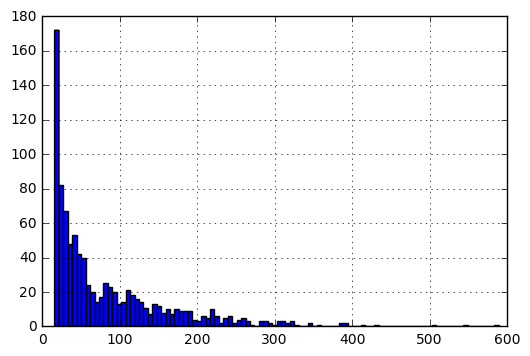

In [11]:
rated_movies = data_train.groupby('user_id').size().sort_values(ascending=False)
rated_movies.hist(bins=100)


##### Mean movie scores by year

/Users/ssegui/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ssegui/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(3.0, 4.4336734693877551)

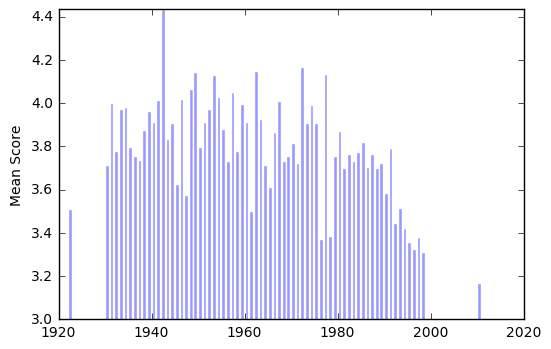

In [12]:
from math import isnan
data_train.loc[:,'release_year'] = data_train['release_date'].apply(lambda x: int(str(x)[-4:]) if isnan(float(str(x)[-4:]))==False else 2010)

rank_per_year = data_train.groupby('release_year')['rating'].mean()
plt.bar(rank_per_year.keys(), rank_per_year, facecolor='#9999ff', edgecolor='white')
plt.ylabel("Mean Score")
plt.ylim((min(rank_per_year),max(rank_per_year)))

##### Which movies are most controversial amongst different ages?

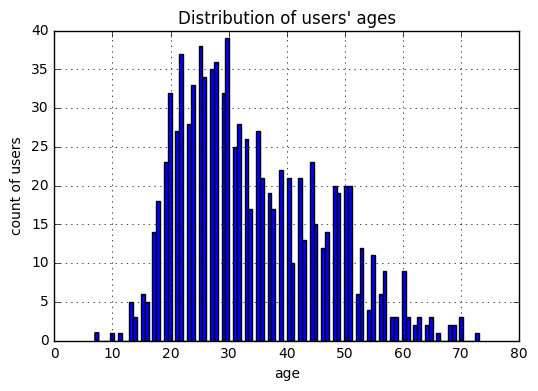

   movie_id  age age_group
0       242   49     40-49
1       242   23     20-29
2       242   42     40-49
3       242   60     60-69
4       242   31     30-39
          rating          
            size      mean
age_group                 
0-9           34  3.852941
10-19       6511  3.486868
20-29      31490  3.467609
30-39      20465  3.555338
40-49      11951  3.582964
50-59       6926  3.638175
60-69       2087  3.659799
70-79        155  3.696774


In [13]:
users.age.hist(bins=100)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')
plt.show()

labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data_train.loc[:,'age_group'] = pd.cut(data_train.age, range(0, 81, 10), right=False, labels=labels)
print data_train[['movie_id','age', 'age_group']].head()

print data_train.groupby('age_group').agg({'rating': [np.size, np.mean]})


<h5>Films that have received at least 250 ratings</h5>

In [14]:
#Grouping titles by rating
ratings_by_title = data.groupby('title').size()
print ratings_by_title[ratings_by_title >= 250].head()

active_titles = ratings_by_title.index[ratings_by_title >= 250]
print active_titles[:5]

title
2001: A Space Odyssey (1968)    259
Air Force One (1997)            431
Alien (1979)                    291
Aliens (1986)                   284
Amadeus (1984)                  276
dtype: int64
Index([u'2001: A Space Odyssey (1968)', u'Air Force One (1997)',
       u'Alien (1979)', u'Aliens (1986)', u'Amadeus (1984)'],
      dtype='object', name=u'title')


<h5>Mean ratings for each movie grouped by gender with minimum of 250 ratings. </h5>



In [15]:
#Display ratings by gender
mean_ratings = data.pivot_table('rating', index='title',columns='sex', aggfunc='mean')
mean_ratings = mean_ratings.ix[active_titles]
print mean_ratings[:10]


sex                                  F         M
title                                           
2001: A Space Odyssey (1968)  3.491228  4.103960
Air Force One (1997)          3.690476  3.606557
Alien (1979)                  3.660714  4.123404
Aliens (1986)                 3.672727  4.013100
Amadeus (1984)                4.038961  4.211055
Apollo 13 (1995)              4.000000  3.909953
Back to the Future (1985)     3.766667  3.857692
Birdcage, The (1996)          3.670455  3.346341
Blade Runner (1982)           3.979167  4.171806
Blues Brothers, The (1980)    3.782609  3.848780


<h6>Movies more highly rated by women</h6>



In [16]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10].F

title
Schindler's List (1993)                   4.632911
Shawshank Redemption, The (1994)          4.562500
Usual Suspects, The (1995)                4.333333
Silence of the Lambs, The (1991)          4.320000
Titanic (1997)                            4.278846
Sense and Sensibility (1995)              4.252632
Star Wars (1977)                          4.245033
Fugitive, The (1993)                      4.166667
One Flew Over the Cuckoo's Nest (1975)    4.150000
Godfather, The (1972)                     4.133333
Name: F, dtype: float64

<h6> Movies are rated with great difference between men and women. Films with great differences and are more highly rated by women and the films more preferred by men. Films with the greatest difference rating between genders</h6>



In [17]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
#Sort by'diff':  films have more different rating and are more highly valued by women
sorted_by_diff = mean_ratings.sort_values(by='diff')
print sorted_by_diff[:15]

#Switching the order to get the films preferred by men which doesn't liked women
print sorted_by_diff[:-15:-1]

# Standard deviation of the ratings to find the films that have generated the most discordant ratings

# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.ix[active_titles]
print rating_std_by_title.sort_values(ascending=False)[:10]

sex                                                  F         M      diff
title                                                                     
Sense and Sensibility (1995)                  4.252632  3.878613 -0.374019
Independence Day (ID4) (1996)                 3.688679  3.356037 -0.332642
Birdcage, The (1996)                          3.670455  3.346341 -0.324113
Truth About Cats & Dogs, The (1996)           3.690722  3.371429 -0.319293
Rock, The (1996)                              3.879121  3.634146 -0.244975
Mr. Holland's Opus (1995)                     3.945652  3.701493 -0.244160
Schindler's List (1993)                       4.632911  4.406393 -0.226519
Broken Arrow (1996)                           3.211538  2.985149 -0.226390
Mission: Impossible (1996)                    3.487179  3.263158 -0.224022
English Patient, The (1996)                   3.809211  3.586626 -0.222584
Star Trek: First Contact (1996)               3.835616  3.616438 -0.219178
Raising Arizona (1987)   

<h6>Average rating given by each user. </h6>




In [18]:
mean_rating_by_user = data.groupby('user_id')['rating'].mean()
mean_rating_by_user[:15]

user_id
1     3.610294
2     3.709677
3     2.796296
4     4.333333
5     2.874286
6     3.635071
7     3.965261
8     3.796610
9     4.272727
10    4.206522
11    3.464088
12    4.392157
13    3.097484
14    4.091837
15    2.875000
Name: rating, dtype: float64

<h6>Highest rated movie on average</h6>



In [19]:
print data.groupby('title')['rating'].mean().sort_values(ascending=False)[:1]

print data.groupby('title')['rating'].mean().ix[active_titles].sort_values(ascending=False)[:1]


title
Marlene Dietrich: Shadow and Light (1996)     5.0
Name: rating, dtype: float64
title
Schindler's List (1993)    4.466443
Name: rating, dtype: float64


<h6>Return highest rated movies of user</h6>

In [20]:
def top_movies(dataFrame,usr):
    max_i = dataFrame[dataFrame.user_id == usr].rating.max() 
    print "Max puntuation of user", usr, "is:", max_i
    return dataFrame[(dataFrame['user_id'] == usr) & (dataFrame['rating'] == max_i )].title

print top_movies(data,2)

Max puntuation of user 2 is: 5
32                        Kolya (1996)
424             Shall We Dance? (1996)
4627             Secrets & Lies (1996)
6455          L.A. Confidential (1997)
11911                     Fargo (1996)
32768            Godfather, The (1972)
33462                 Star Wars (1977)
55954                   Titanic (1997)
58130    Wings of the Dove, The (1997)
63360     Sense and Sensibility (1995)
71232         Good Will Hunting (1997)
78981                      Emma (1996)
82001        As Good As It Gets (1997)
Name: title, dtype: object


##### <h5>User Similarity</h5> <h6>Movies in common between users </h6>

In [21]:
# dataframe with the data from user 1
data_user_1 = data_train[data_train.user_id==1]
# dataframe with the data from user 2
data_user_2 = data_train[data_train.user_id==2]
# Compute the set of common movies
common_movies = set(data_user_1.movie_id).intersection(data_user_2.movie_id)
print "\nNumber of common movies",len(common_movies),'\n'

#Subdataframe with only with the common movies
mask = (data_user_1.movie_id.isin(common_movies))
data_user_1 = data_user_1[mask]
print data_user_1[['title','rating']].head()

mask = (data_user_2.movie_id.isin(common_movies))
data_user_2 = data_user_2[mask]
print data_user_2[['title','rating']].head()




Number of common movies 11 

                                    title  rating
14                           Kolya (1996)       5
1306  Truth About Cats & Dogs, The (1996)       5
1618                 Birdcage, The (1996)       4
3479                  Men in Black (1997)       4
6080               Full Monty, The (1997)       5
                                    title  rating
32                           Kolya (1996)       5
1336  Truth About Cats & Dogs, The (1996)       4
1648                 Birdcage, The (1996)       4
3510                  Men in Black (1997)       4
6129               Full Monty, The (1997)       4


<h6>Compute the users similarity </h6>

In [22]:
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean

# Returns a distance-based similarity score for user1 and user2
def SimEuclid(DataFrame,User1,User2,min_common_items=1):
    # GET MOVIES OF USER1
    movies_user1=DataFrame[DataFrame['user_id'] ==User1 ]
    # GET MOVIES OF USER2
    movies_user2=DataFrame[DataFrame['user_id'] ==User2 ]
    
    # FIND SHARED FILMS
    rep=pd.merge(movies_user1 ,movies_user2,on='movie_id')    
    if len(rep)==0:
        return 0
    if(len(rep)<min_common_items):
        return 0
    #return distEuclid(rep['rating_x'],rep['rating_y']) 
    return 1.0/(1.0+euclidean(rep['rating_x'],rep['rating_y'])) 

# Returns a pearsonCorrealation-based similarity score for person1 and person2
def SimPearson(DataFrame,User1,User2,min_common_items=1):
    # GET MOVIES OF USER1
    movies_user1=DataFrame[DataFrame['user_id'] ==User1 ]
    # GET MOVIES OF USER2
    movies_user2=DataFrame[DataFrame['user_id'] ==User2 ]
    
    # FIND SHARED FILMS
    rep=pd.merge(movies_user1 ,movies_user2,on='movie_id',)
    if len(rep)==0:
        return 0    
    if(len(rep)<min_common_items):
        return 0    
    res=pearsonr(rep['rating_x'],rep['rating_y'])[0]
    if(isnan(res)):
        return 0
    return res

print SimPearson(data_train,1,2)
print SimEuclid(data_train,1,2)

0.116071428571
0.186605496863
